In [1]:
1+1

2

In [5]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle
import gc
import re

import numpy as np
import pandas as pd

from importlib import reload

In [4]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

## Load the data

In [15]:
ls ../data

Age/  Ethnicity/  Party/  embedded/  tokenized/


In [16]:
main_dir = '/tf/notebooks/'

# Ethniciy Model

## Load the data

In [19]:
ethn_data_path = main_dir + 'final-project/Classification/data/Ethnicity'

In [20]:
with open(os.path.join(ethn_data_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(ethn_data_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(ethn_data_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)
with open(os.path.join(ethn_data_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(ethn_data_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(ethn_data_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [21]:
len(train), len(train_ids), len(train_target), len(val), len(val_ids), len(val_target)

(28280, 28280, 28280, 9426, 9426, 9426)

In [22]:
sum(train_target), sum(val_target)

(14140, 4713)

# Age Model

In [32]:
age_data_path = main_dir + 'final-project/Classification/data/Age'

In [33]:
with open(os.path.join(age_data_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(age_data_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(age_data_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)
with open(os.path.join(age_data_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(age_data_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(age_data_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [34]:
len(train), len(train_ids), len(train_target), len(val), len(val_ids), len(val_target)

(28280, 28280, 28280, 9426, 9426, 9426)

In [35]:
sum(train_target), sum(val_target)

(14140, 4713)

## EDA on train data

In [23]:
explore_data.get_num_words_per_sample(train)

253.0

In [24]:
explore_data.get_num_words_per_sample(val)

256.0

Speech length percentiles
    0     10    20     30     40     50     60     70     80     90       100
0  31.0  48.0  89.0  146.0  195.0  253.0  330.0  424.0  578.0  860.0  21422.0


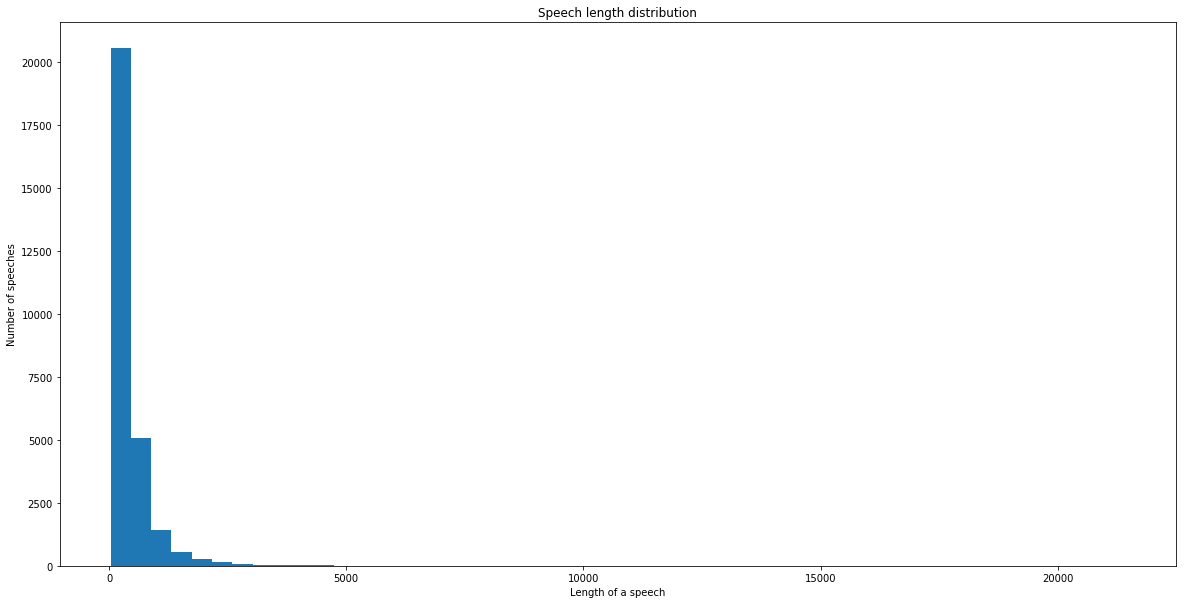

In [25]:
explore_data.plot_sample_length_distribution(train)

## N-gram model

In [33]:
train_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'test_vec.npz'))

In [ ]:
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))

In [34]:
train_vec.shape, val_vec.shape, test_vec.shape

((57808, 10000), (19268, 10000), (19272, 10000))

### Model: Multi-Layer Perceptron (Vanilla NN)

## Model evaluation

In [26]:
with open(os.path.join(data_path, 'val_pred_probs'), 'rb') as fp:
    val_pred_probs = pickle.load(fp)

In [27]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

6934

Confusion matrix, without normalization
[[3561 1152]
 [1340 3373]]
              precision    recall  f1-score   support

        Male       0.73      0.76      0.74      4713
      Female       0.75      0.72      0.73      4713

   micro avg       0.74      0.74      0.74      9426
   macro avg       0.74      0.74      0.74      9426
weighted avg       0.74      0.74      0.74      9426



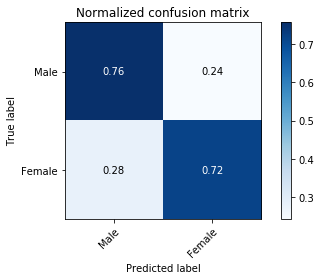

In [28]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['Male', 'Female']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

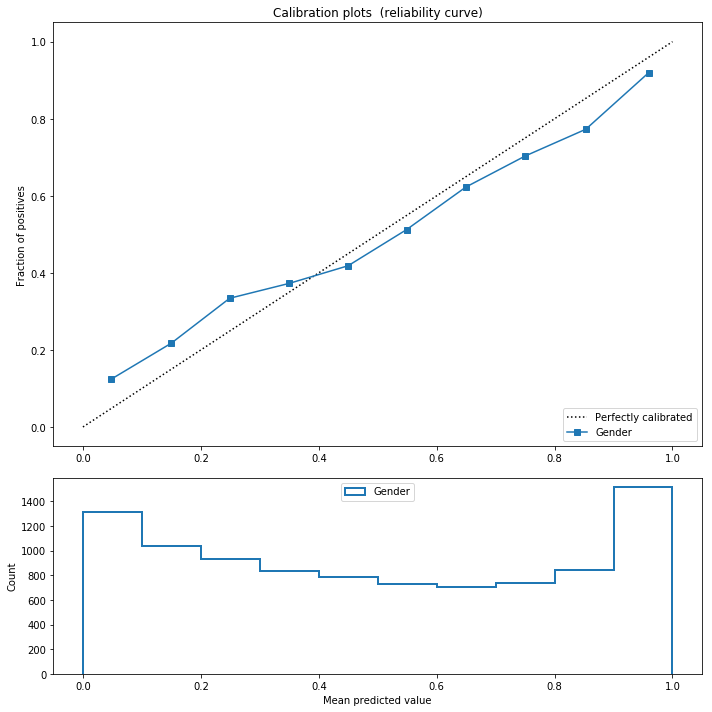

In [29]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Gender')

In [30]:
descr_df = pd.read_csv(main_dir+'final-project/data/QA/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(9426, 16)

In [31]:
descr_df.head()

,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
speech_id,,,,,,,,,,,,,,,,
970034678,19810521,3397,507,97112170.0,D,97,H,OH,B,57.0,0.0,1.0,0.0,Mr. STOKES,"STOKES, LOUIS",fuzzy
1140107584,20160712,3503,565,114121700.0,D,114,H,CA,B,78.0,0.0,1.0,1.0,Ms. MAXINE WATERS of California,"WATERS, MAXINE",exact
1140036275,20150617,985,168,114121750.0,D,114,H,FL,B,74.0,0.0,1.0,1.0,Ms. WILSON of Florida,"WILSON, FREDERICA",exact
1140062682,20151116,2802,528,114119300.0,D,114,H,MD,B,58.0,1.0,1.0,1.0,Ms. EDWARDS,"EDWARDS, DONNA",exact
1030014310,19930316,419,67,103112360.0,D,103,H,MO,B,63.0,0.0,1.0,0.0,Mr. CLAY,"CLAY, WILLIAM",fuzzy


In [56]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs, 
                                   val_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.39,0.41,0.99,0.82,0.75,0.94
0.6,0.97,0.83,0.98,0.93,1.11,0.83
1.0,1.58,1.62,1.01,1.19,1.19,1.12


In [10]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
sonoma 	 11479.1
sonoma county 	 9561.5
the sonoma 	 4714.7
in sonoma 	 4674.3
of sonoma 	 3948.5
smart security 	 3922.0
century smart 	 3723.2
smart stands 	 3291.8
create smart 	 3056.8
multilateral partnerships 	 2736.7


bin,1,2,3,4
century smart,0.0,0.0,1.0,8.0
create smart,0.0,0.0,0.0,6.0
in sonoma,0.0,0.0,13.0,24.0
multilateral partnerships,0.0,0.0,0.0,7.0
of sonoma,0.0,0.0,10.0,21.0
smart security,0.0,0.0,32.0,48.0
smart stands,0.0,0.0,2.0,8.0
sonoma,0.0,1.0,78.0,113.0
sonoma county,0.0,0.0,36.0,84.0
the sonoma,0.0,0.0,18.0,31.0


#### Run the following test on a random subset of the validation sample

In [11]:
np.random.seed(100)
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.9,0.1])
val_random.sum()/val_random.shape[0]

0.10097901651891064

In [12]:
val_sample, val_ids_sample, val_pred_probs_sample = [], [], []
for i in range(len(val_ids)):
    if val_random[i] == 1:
        val_sample.append(val[i])
        val_ids_sample.append(val_ids[i])
        val_pred_probs_sample.append(val_pred_probs[i])
len(val_sample), len(val_ids_sample), len(val_pred_probs_sample)

(6333, 6333, 6333)

In [13]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
the senator from
are going to
the gentleman from
one of the
would like to
we are going
of the united
we are going to
is going to
--------------------

In 0.6 bin top 10 ngrams:

the united states
the gentleman from
would like to
my colleagues to
one of the
mr speaker rise
ask unanimous consent
rise today to
the american people
of the united
--------------------

In 1.0 bin top 10 ngrams:

the united states
my colleagues to
one of the
the american people
mr speaker rise
the gentleman from
would like to
urge my colleagues
be able to
we need to
--------------------


In [12]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 1.00):

date                        19950323
char_count                      1963
word_count                       334
speakerid                1.04114e+08
Party                              R
Congress                         104
Chamber                            H
State                             WA
Ethnicity                          W
Age                               55
Age_lt_med                         0
NonWhite                           0
Female                             1
speaker       Ms. DUNN of Washington
Full Name             DUNN, JENNIFER
match                          exact
Name: 1040044513, dtype: object

 Mr. Chairman. on behalf of some of Americas neediest and yet valued citizens. we begin the process of ending welfare as a way of life and restoring welfare assistance to itsoriginal purpose. to provide temporary help to our neighbors in need. Air. Chairman. Americans are a generous people who have long demonstrated our commitment to